In [1]:
# This program predict the house price

# import dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)


In [2]:
df1 = pd.read_csv("E:/HousePricePredictionMumbai/Mumbai.csv")
df1.head(5)

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,bhk,1,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,rk,0,1,1,1,1,0,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,rk,0,1,1,1,1,0,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,rk,0,1,1,0,0,1,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,rk,0,1,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0


In [3]:
df1.shape

(7719, 42)

In [4]:
#drop unused columns
df2 = df1.drop(['Resale','MaintenanceStaff','Gymnasium','SwimmingPool','LandscapedGardens','JoggingTrack','RainWaterHarvesting','IndoorGames','ShoppingMall','Intercom','SportsFacility','ATM','ClubHouse','School','24X7Security','PowerBackup','StaffQuarter','Cafeteria','MultipurposeRoom','Hospital','WashingMachine','AC','Wifi','LiftAvailable','BED','VaastuCompliant','Microwave','GolfCourse','TV','DiningTable','Sofa','Wardrobe','Refrigerator','Childrensplayarea'],axis='columns')
df2.head(8)

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection
0,4850000,720,Kharghar,bhk,1,1,1,0
1,4500000,600,Kharghar,rk,0,1,1,0
2,6700000,650,Kharghar,rk,0,1,1,0
3,4500000,650,Kharghar,rk,0,1,1,0
4,5000000,665,Kharghar,rk,0,1,1,0
5,17000000,2000,Kharghar,bhk,4,4,1,0
6,12500000,1550,Kharghar,bhk,3,3,1,1
7,10500000,1370,Sector-13 Kharghar,bhk,3,3,1,0


In [5]:
df2.isnull().sum()

Price               0
Area                0
Location            0
sizeRkorBhk         2
Num_of_bedrooms     0
Num_of_bathrooms    0
CarParking          0
Gasconnection       0
dtype: int64

In [6]:
df3 = df2.dropna()
df3.isnull().sum()

Price               0
Area                0
Location            0
sizeRkorBhk         0
Num_of_bedrooms     0
Num_of_bathrooms    0
CarParking          0
Gasconnection       0
dtype: int64

In [7]:
df3['sizeRkorBhk'].unique()

array(['bhk', 'rk'], dtype=object)

In [8]:
df3['Num_of_bedrooms'].unique()

array([1, 0, 4, 3, 2, 5, 6, 7], dtype=int64)

In [9]:
df3['Num_of_bathrooms'].unique()

array([1, 4, 3, 2, 5, 6, 7], dtype=int64)

In [10]:
df3.Area.unique()

array([ 720,  600,  650, ...,  250, 1162,  435], dtype=int64)

In [11]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
df3[~df3['Area'].apply(is_float)].head(10)

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection


In [14]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
convert_sqft_to_num('1320')

1320.0

In [16]:
convert_sqft_to_num('1320 - 1500')

1410.0

In [17]:
convert_sqft_to_num('1320sq m')

In [18]:
# Create a copy
df4 = df3.copy()

In [21]:
df4.loc[320]

Price                 90000000
Area                      5245
Location            Thane West
sizeRkorBhk                bhk
Num_of_bedrooms              5
Num_of_bathrooms             5
CarParking                   1
Gasconnection                1
Name: 320, dtype: object

In [22]:
df5 = df4.copy()
df5['price_per_sqft']=df5['Price']/df5['Area']
df5.head(7)

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,price_per_sqft
0,4850000,720,Kharghar,bhk,1,1,1,0,6736.111111
1,4500000,600,Kharghar,rk,0,1,1,0,7500.000000
2,6700000,650,Kharghar,rk,0,1,1,0,10307.692308
3,4500000,650,Kharghar,rk,0,1,1,0,6923.076923
4,5000000,665,Kharghar,rk,0,1,1,0,7518.796992
5,17000000,2000,Kharghar,bhk,4,4,1,0,8500.000000
6,12500000,1550,Kharghar,bhk,3,3,1,1,8064.516129


In [23]:
len(df5.Location.unique())

413

In [24]:
df5.Location = df5.Location.apply(lambda x:x.strip())
Location_stats = df5.groupby('Location')['Location'].agg('count').sort_values(ascending = False)
Location_stats

Location
Kharghar                 681
Thane West               576
Mira Road East           481
Ulwe                     391
Nala Sopara              225
                        ... 
Ramdev Park                1
Rawal Pada                 1
Rustomjee Global City      1
Sahkar Nagar               1
worli sea face             1
Name: Location, Length: 413, dtype: int64

In [25]:
len(Location_stats[Location_stats <= 10])

312

In [26]:
Location_stats_less_than_10 = Location_stats[Location_stats <= 10]
Location_stats_less_than_10

Location
Rajendra Nagar           10
Kalamboli                10
Prabhadevi               10
Sector 10                10
Mumbai Central           10
                         ..
Ramdev Park               1
Rawal Pada                1
Rustomjee Global City     1
Sahkar Nagar              1
worli sea face            1
Name: Location, Length: 312, dtype: int64

In [27]:
len(df5.Location.unique())

413

In [28]:
df5.Location = df5.Location.apply(lambda x:'other' if x in Location_stats_less_than_10 else x)
len(df5.Location.unique())

102

In [29]:
df5.head(10)

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,price_per_sqft
0,4850000,720,Kharghar,bhk,1,1,1,0,6736.111111
1,4500000,600,Kharghar,rk,0,1,1,0,7500.000000
2,6700000,650,Kharghar,rk,0,1,1,0,10307.692308
3,4500000,650,Kharghar,rk,0,1,1,0,6923.076923
4,5000000,665,Kharghar,rk,0,1,1,0,7518.796992
5,17000000,2000,Kharghar,bhk,4,4,1,0,8500.000000
6,12500000,1550,Kharghar,bhk,3,3,1,1,8064.516129
7,10500000,1370,other,bhk,3,3,1,0,7664.233577
8,10500000,1356,Kharghar,bhk,3,3,1,0,7743.362832
9,15000000,1680,Kharghar,bhk,3,3,1,1,8928.571429


In [30]:
df5[df5.Area/df5.Num_of_bedrooms < 300].head()

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,price_per_sqft
2000,260000000,1165,other,bhk,4,4,1,1,223175.965665
2065,260000000,1165,other,bhk,4,4,1,1,223175.965665
3624,3500000,586,Andheri West,rk,2,2,0,0,5972.696246
5406,5700000,901,Mira Road East,bhk,4,4,1,1,6326.304107


In [31]:
df5.shape

(7717, 9)

In [32]:
df6 = df5[~(df5.Area / df5.Num_of_bedrooms < 300)]
df6.shape

(7713, 9)

In [33]:
df6.price_per_sqft.describe()

count      7713.000000
mean      16120.418053
std       19298.449729
min         460.526316
25%        6461.538462
50%       10410.094637
75%       18723.994452
max      400000.000000
Name: price_per_sqft, dtype: float64

In [34]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('Location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st))&(subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(6785, 9)

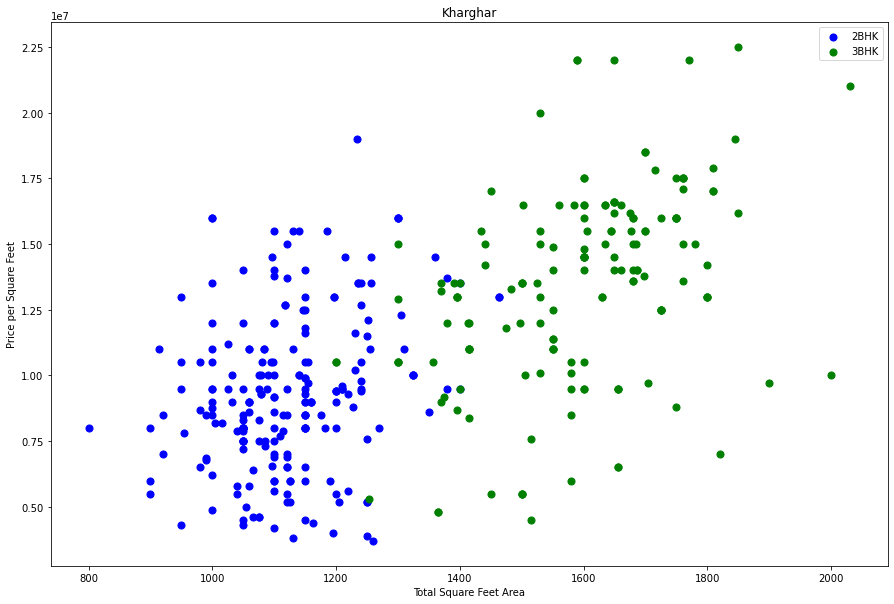

In [35]:
def plot_scatter_chart(df,Location):
    bhk2 = df[(df.Location == Location)&(df.Num_of_bedrooms == 2)]
    bhk3 = df[(df.Location == Location)&(df.Num_of_bedrooms == 3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.Area,bhk2.Price,color='blue',label='2BHK',s=50)
    plt.scatter(bhk3.Area,bhk3.Price,color='green',label='3BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price per Square Feet")
    plt.title(Location)
    plt.legend()
    
plot_scatter_chart(df7,"Kharghar")    

In [36]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for Location,Location_df in df.groupby('Location'):
        Num_of_bedrooms_stats = {}
        for Num_of_bedrooms,Num_of_bedrooms_df in Location_df.groupby('Num_of_bedrooms'):
            Num_of_bedrooms_stats[Num_of_bedrooms]={
                'mean':np.mean(Num_of_bedrooms_df.price_per_sqft),
                'std':np.std(Num_of_bedrooms_df.price_per_sqft),
                'count':Num_of_bedrooms_df.shape[0]
            }
    for Num_of_bedrooms,Num_of_bedrooms_df in df.groupby('Num_of_bedrooms'):
        stats = Num_of_bedrooms_stats.get(Num_of_bedrooms-1)
        if stats and stats['count']>5:
            exclude_indices = np.append(exclude_indices,Num_of_bedrooms_df[
                Num_of_bedrooms_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')          
        
df8 = remove_bhk_outliers(df7)
df8.shape

(4509, 9)

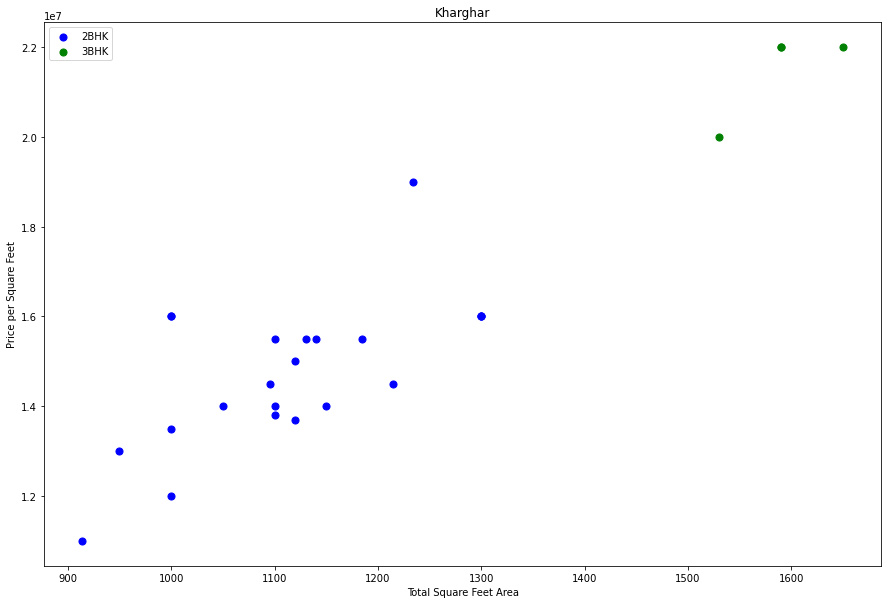

In [37]:
plot_scatter_chart(df8,"Kharghar")

Text(0, 0.5, 'Count')

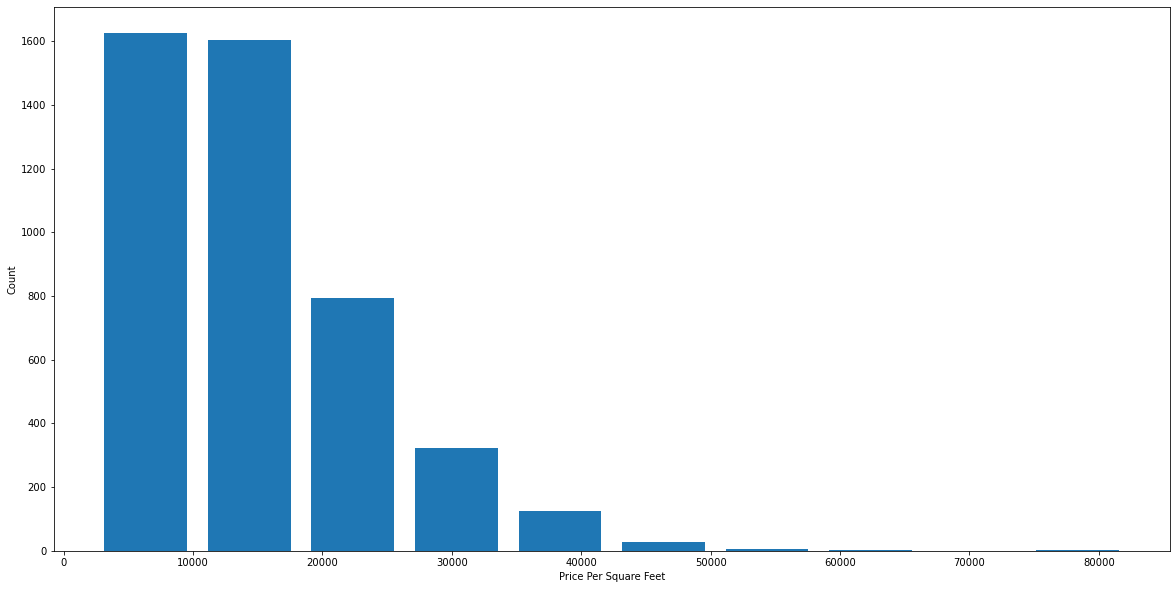

In [38]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [39]:
df8.head(5)

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,price_per_sqft
0,6200000,400,Airoli,rk,0,1,1,0,15500.000000
2,14900000,1245,Airoli,bhk,2,2,1,1,11967.871486
3,14000000,1183,Airoli,bhk,2,2,1,0,11834.319527
5,6400000,495,Airoli,rk,0,1,0,0,12929.292929
6,3800000,495,Airoli,rk,0,1,0,0,7676.767677


In [40]:
df8['CarParking'].unique()

array([1, 0], dtype=int64)

In [41]:
df8['Num_of_bathrooms'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [42]:
df8['Gasconnection'].unique()

array([0, 1], dtype=int64)

In [43]:
df8[df8.Num_of_bathrooms > 5]

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,price_per_sqft
4624,90000000,5642,Sion,bhk,6,6,1,1,15951.790145
4625,90000000,5642,Sion,bhk,6,6,1,1,15951.790145
6445,55000000,2500,other,bhk,7,7,1,1,22000.000000


Text(0, 0.5, 'Count')

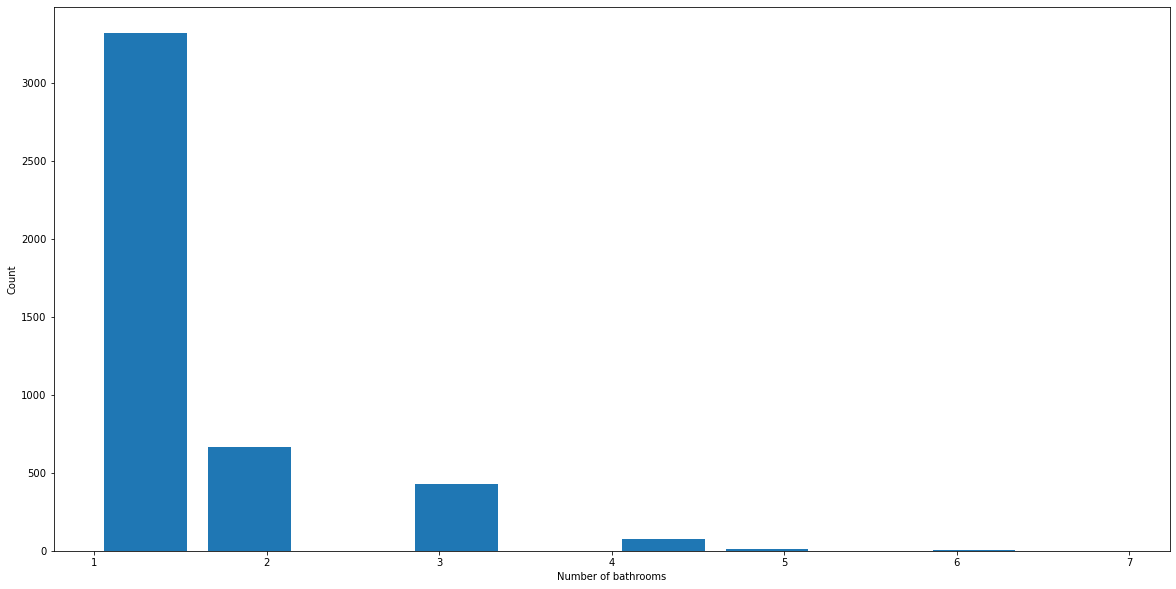

In [44]:
plt.hist(df8.Num_of_bathrooms,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [45]:
df8['Area'].unique()

array([ 400, 1245, 1183,  495, 1050,  600,  650,  780,  640,  660,  666,
        700,  680,  675,  527,  781,  730,  690,  466,  595, 1010,  900,
        625,  725,  827,  634,  728,  550,  630,  644,  709,  766,  797,
       1100, 1000, 1480, 3025, 1120, 1450, 1114, 1260, 2016,  655,  922,
       1020,  915,  620,  950, 1080, 1356,  750, 1150, 1300,  850,  300,
        859,  969,  670,  890, 1113,  742, 1124,  878,  678,  716,  902,
        560, 1065,  426,  802,  864,  720, 1200, 3300,  997, 1950, 1361,
        390,  723, 2590, 1800, 3080, 3780, 1875, 1470, 1600, 1400,  800,
       1550, 1850, 1166,  788,  790, 1193,  707,  944,  923,  420, 1648,
       1705, 1418, 1210, 2500, 2550,  930, 1680, 2400,  667, 2250, 1350,
       2525, 1250, 1003, 2780, 2260, 1264,  774,  713,  708,  926,  934,
        960,  810, 1357, 1344, 2050, 1509, 4650,  768,  430,  500,  441,
        710,  820,  510,  703,  841,  873,  762,  615,  535,  798,  580,
        505,  672,  450, 1141, 1305,  425,  838, 19

In [46]:
df8[df8.Num_of_bathrooms > df8.Num_of_bedrooms+2]

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,price_per_sqft
1235,8500000,676,Ghatkopar,rk,0,3,1,0,12573.964497


In [47]:
#Remove bathrooms outlier 
df9 = df8[df8.Num_of_bathrooms < df8.Num_of_bedrooms+2]
df9.shape

(4508, 9)

In [48]:
#drop price_per_sqft col
df10 = df9.drop(['price_per_sqft'],axis='columns')
df10.head(5)

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection
0,6200000,400,Airoli,rk,0,1,1,0
2,14900000,1245,Airoli,bhk,2,2,1,1
3,14000000,1183,Airoli,bhk,2,2,1,0
5,6400000,495,Airoli,rk,0,1,0,0
6,3800000,495,Airoli,rk,0,1,0,0


In [49]:
#Model Training


In [50]:
dummies = pd.get_dummies(df10.Location)
dummies.head(3)

,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,Badlapur East,Bandra East,Bandra West,Belapur,...,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(3)

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,Airoli,Ambernath East,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,6200000,400,Airoli,rk,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,14900000,1245,Airoli,bhk,2,2,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,14000000,1183,Airoli,bhk,2,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#drop Location col
df12 = df11.drop('Location',axis='columns')
df12.head(3)

,Price,Area,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,Airoli,Ambernath East,Ambernath West,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,6200000,400,rk,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14900000,1245,bhk,2,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14000000,1183,bhk,2,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df12.shape

(4508, 107)

In [54]:
# for size(rk or bhk) col


In [55]:
dummies2 = pd.get_dummies(df12.sizeRkorBhk)
dummies2.head(3)

,bhk,rk
0,0,1
2,1,0
3,1,0


In [56]:
df13 = pd.concat([df12,dummies2],axis='columns')
df13.head(3)

,Price,Area,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,Airoli,Ambernath East,Ambernath West,...,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai,bhk,rk
0,6200000,400,rk,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,14900000,1245,bhk,2,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,14000000,1183,bhk,2,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [57]:
#drop sizeRkorBhk col
df14 = df13.drop('sizeRkorBhk',axis='columns')
df14.head(3)

,Price,Area,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,Airoli,Ambernath East,Ambernath West,Andheri,...,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai,bhk,rk
0,6200000,400,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,14900000,1245,2,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,14000000,1183,2,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [58]:
X = df14.drop('Price',axis='columns')
X.head(5)

,Area,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,...,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai,bhk,rk
0,400,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1245,2,2,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1183,2,2,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,495,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,495,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
Y = df14.Price
Y.head(5)

0     6200000
2    14900000
3    14000000
5     6400000
6     3800000
Name: Price, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=10)


In [61]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.7330310454699334

In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,Y,cv=cv)

array([   0.75218189, -132.63173604,    0.31908042,    0.71371532,
          0.69545826])

In [63]:
#Sklearn provide GridSearchCV API for train the data with different algo

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            } 
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores = []
    cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        return pd.DataFrame(scores,columns=['model','best_score','best_params'])
    
    find_best_model_using_gridsearchcv(X,Y)

In [64]:
print(X_train.shape)
print(X_test.shape)

(3606, 107)
(902, 107)


In [65]:
X.columns

Index(['Area', 'Num_of_bedrooms', 'Num_of_bathrooms', 'CarParking',
       'Gasconnection', 'Airoli', 'Ambernath East', 'Ambernath West',
       'Andheri', 'Andheri East',
       ...
       'Virar', 'Virar East', 'Virar West', 'Wadala', 'Wadala East Wadala',
       'Worli', 'matunga east', 'mumbai', 'bhk', 'rk'],
      dtype='object', length=107)

In [66]:
np.where(X.columns == 'Ambernath East')[0][0]

6

In [74]:
def predict_price(Location,Area,Num_of_bathrooms,Num_of_bedrooms):
    loc_index = np.where(X.columns == Location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0]=Area
    x[1]=Num_of_bathrooms
    x[2]=Num_of_bedrooms
    if loc_index >= 0:
        x[loc_index] = 1
        
        return lr_clf.predict([x])[0]
    

In [78]:
predict_price('Virar',1000,1,2)

13564582.129650885

In [79]:
predict_price('Airoli',495,1,0)

4370646.247461321

In [80]:
predict_price('Airoli',800,1,2)

13784762.771399014

In [81]:
#

In [82]:
import pickle
with open('mumbai_house_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [83]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))